<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 177.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 166.2 MB/s eta 0:00:00


In [3]:
!pip install matplotlib
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-11-22 19:27:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  14.6MB/s    in 22s     

2025-11-22 19:27:50 (6.96 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



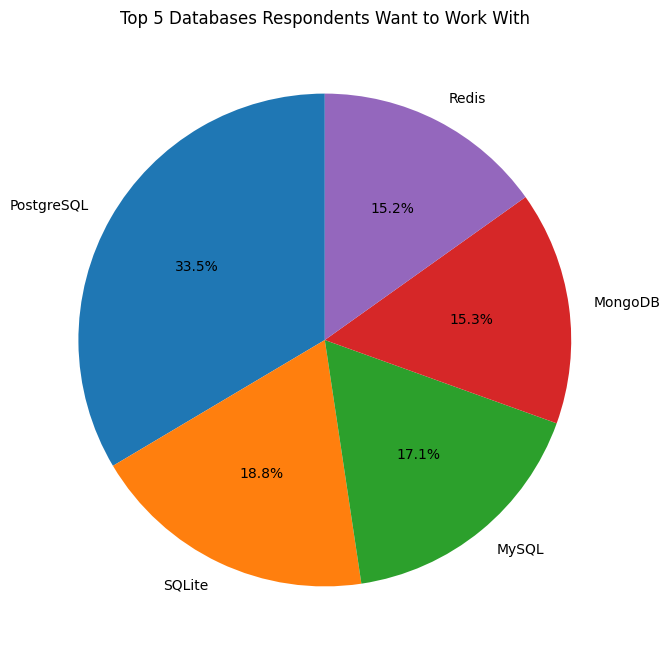

In [5]:
# Step 1: Handle missing values
db_col = df['DatabaseWantToWorkWith'].dropna()

# Step 2: Split multiple entries (e.g., "MySQL; PostgreSQL")
db_split = db_col.str.split(';')

# Step 3: Explode into individual rows
db_exploded = db_split.explode()

# Step 4: Count each database
db_counts = db_exploded.value_counts()

# Step 5: Select the top 5
top5_db = db_counts.head(5)

# Step 6: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5_db, labels=top5_db.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Databases Respondents Want to Work With")
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



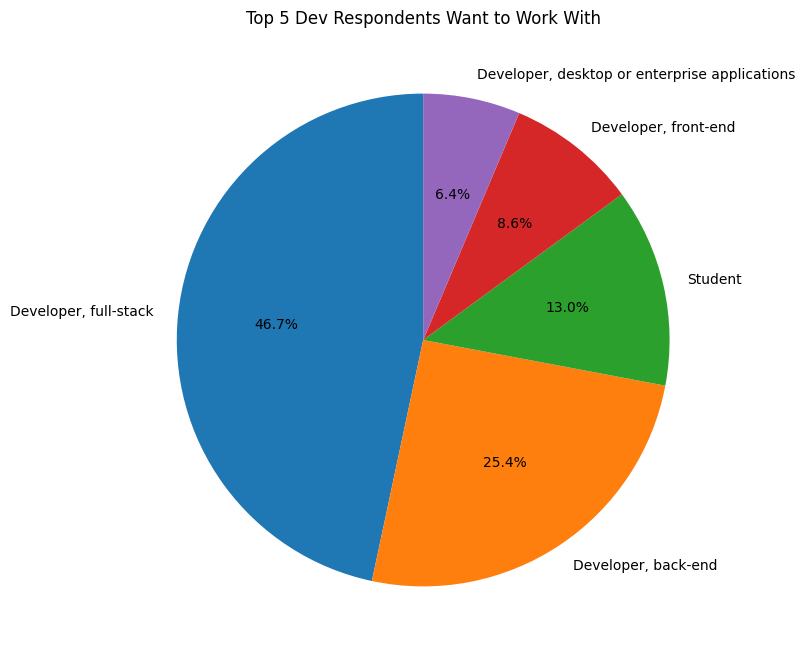

In [6]:
# Step 1: Handle missing values
db_col = df['DevType'].dropna()

# Step 2: Split multiple entries (e.g., "MySQL; PostgreSQL")
db_split = db_col.str.split(';')

# Step 3: Explode into individual rows
db_exploded = db_split.explode()

# Step 4: Count each database
db_counts = db_exploded.value_counts()

# Step 5: Select the top 5
top5_db = db_counts.head(5)

# Step 6: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5_db, labels=top5_db.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Dev Respondents Want to Work With")
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



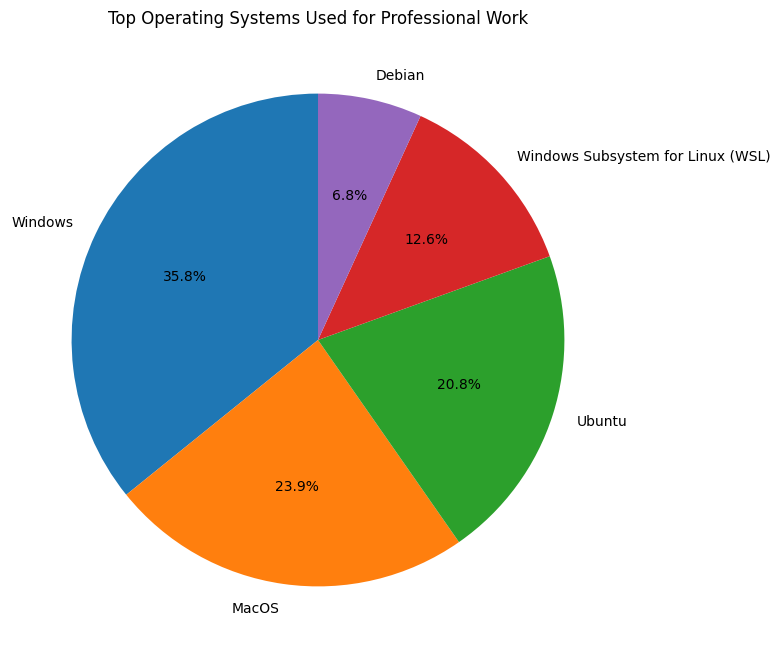

In [12]:
# Step 1: Drop missing values
os_col = df['OpSysProfessional use'].dropna()

# Step 2: Split multi-select entries (e.g., "Windows; Linux-based")
os_split = os_col.str.split(';')

# Step 3: Explode into individual OS entries
os_exploded = os_split.explode()

# Step 4: Count OS frequencies
os_counts = os_exploded.value_counts()

# Step 5: Select top 5 OS categories
top_os = os_counts.head(5)

# Step 6: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_os, labels=top_os.index, autopct='%1.1f%%', startangle=90)
plt.title("Top Operating Systems Used for Professional Work")
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



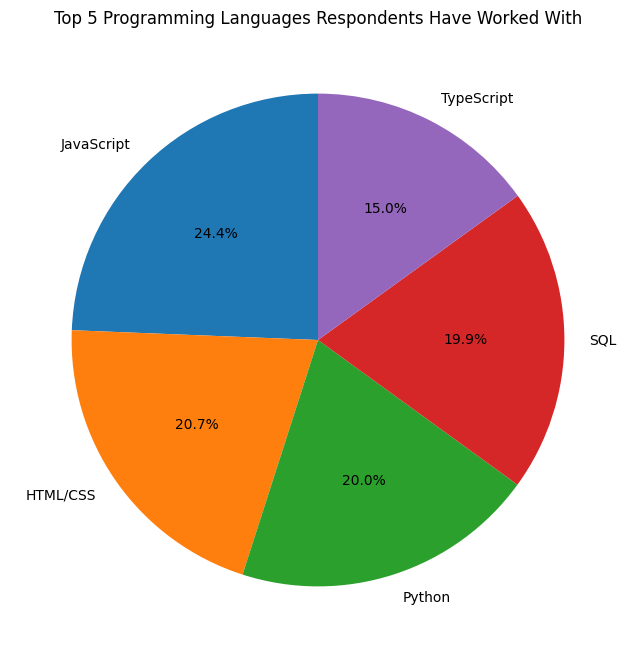

In [13]:
# Step 1: Drop missing values
lang_col = df['LanguageHaveWorkedWith'].dropna()

# Step 2: Split entries (multi-select)
lang_split = lang_col.str.split(';')

# Step 3: Explode into individual languages
lang_exploded = lang_split.explode()

# Step 4: Count languages
lang_counts = lang_exploded.value_counts()

# Step 5: Select top 5 languages
top5_lang = lang_counts.head(5)

# Step 6: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5_lang, labels=top5_lang.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Programming Languages Respondents Have Worked With")
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



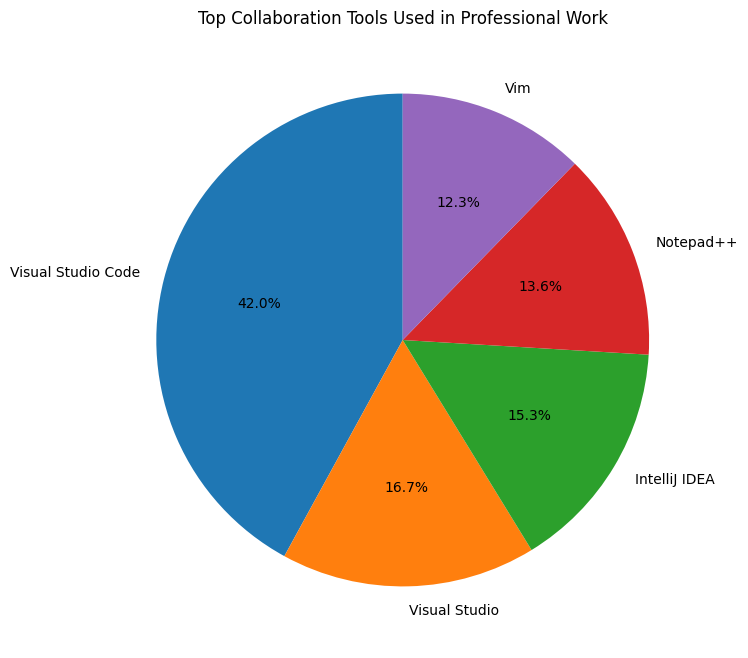

In [14]:
# Step 1: Drop missing values
collab_col = df['NEWCollabToolsHaveWorkedWith'].dropna()

# Step 2: Split multi-select entries (e.g., "Slack; Zoom")
collab_split = collab_col.str.split(';')

# Step 3: Explode into individual collaboration tools
collab_exploded = collab_split.explode()

# Step 4: Count tool occurrences
collab_counts = collab_exploded.value_counts()

# Step 5: Select the top 5 collaboration tools
top5_collab = collab_counts.head(5)

# Step 6: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5_collab, labels=top5_collab.index, autopct='%1.1f%%', startangle=90)
plt.title("Top Collaboration Tools Used in Professional Work")
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



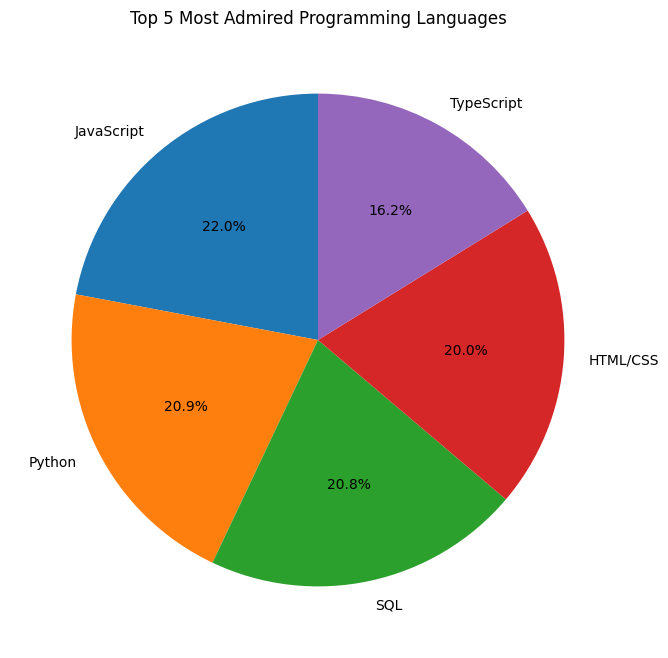

In [15]:
# 3.1 Pie Chart for Most Admired Programming Languages

lang_admired = df["LanguageAdmired"].dropna()
lang_admired_split = lang_admired.str.split(";")
lang_admired_exploded = lang_admired_split.explode()

top5_lang_admired = lang_admired_exploded.value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top5_lang_admired, labels=top5_lang_admired.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Most Admired Programming Languages")
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



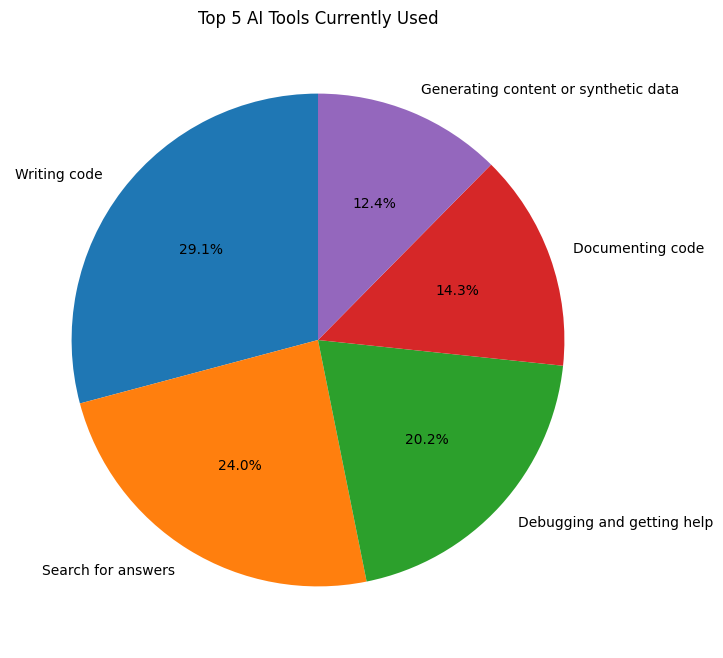

In [16]:
# 3.2 Pie Chart for AI Tools Currently Used

ai_tools = df["AIToolCurrently Using"].dropna()
ai_tools_split = ai_tools.str.split(";")
ai_tools_exploded = ai_tools_split.explode()

top5_ai_tools = ai_tools_exploded.value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top5_ai_tools, labels=top5_ai_tools.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 AI Tools Currently Used")
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



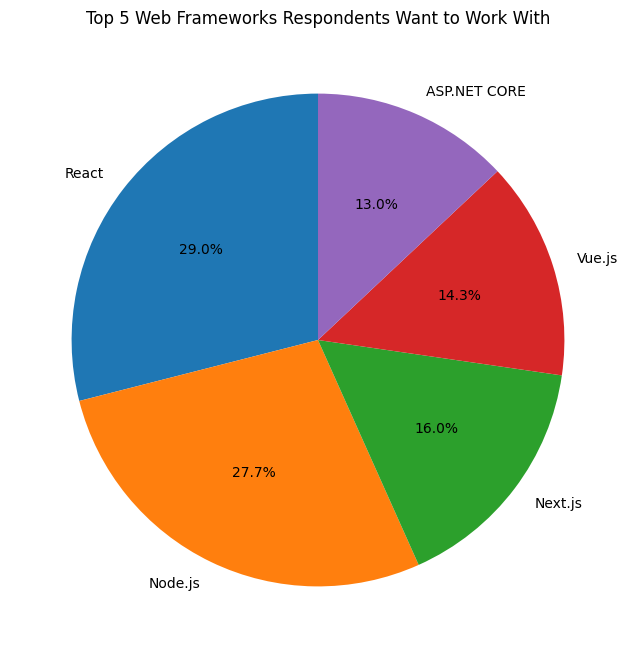

In [17]:
# 3.3 Pie Chart for Preferred Web Frameworks

webframe = df["WebframeWantToWorkWith"].dropna()
webframe_split = webframe.str.split(";")
webframe_exploded = webframe_split.explode()

top5_webframes = webframe_exploded.value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top5_webframes, labels=top5_webframes.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Web Frameworks Respondents Want to Work With")
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



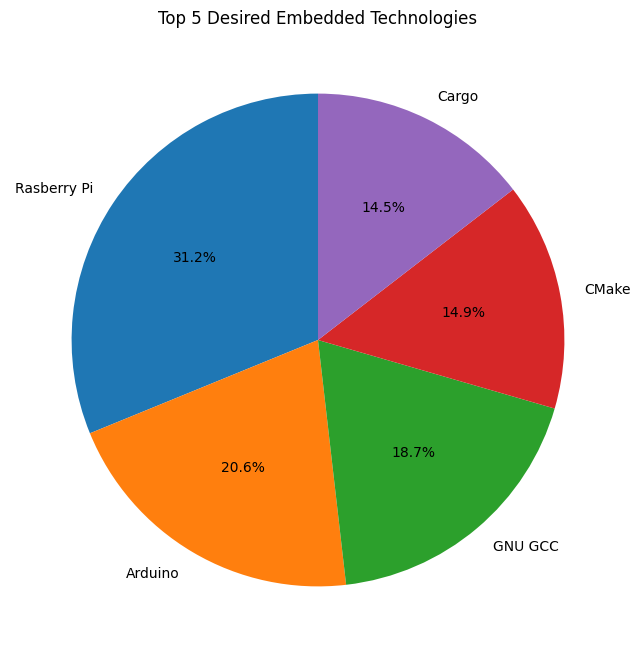

In [18]:
# 3.4 Pie Chart for Most Desired Embedded Technologies

embedded = df["EmbeddedWantToWorkWith"].dropna()
embedded_split = embedded.str.split(";")
embedded_exploded = embedded_split.explode()

top5_embedded = embedded_exploded.value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top5_embedded, labels=top5_embedded.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Desired Embedded Technologies")
plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
